<a href="https://colab.research.google.com/github/kausnz/ml_zoomcamp_homework/blob/main/homework/ml_zoomcamp_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Week 4 - Homework

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.


## Dataset

In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
```
The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column `card`). 

In [284]:
%autosave 1

Autosaving every 1 seconds


In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Preparation

* Create the target variable by mapping `yes` to 1 and `no` to 0. 
* Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`.

In [286]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
df = pd.read_csv('AER_credit_card_data.csv')

--2022-10-03 10:08:57--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv.12’

AER_credit_card_dat 100%[===================>]  71.53K  --.-KB/s    in 0.01s   

2022-10-03 10:08:57 (5.80 MB/s) - ‘AER_credit_card_data.csv.12’ saved [73250/73250]



In [287]:
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [288]:
# How many yes and no values are there in column 'card'? Any other values in this column that needs to be cleaned up?
from collections import Counter
Counter(df.card)

# Looks clean.

Counter({'yes': 1023, 'no': 296})

In [289]:
# Converting 'yes' to ones and 'no' to zeros in the target variable 'card'.
df['card'] = (df.card == 'yes').astype(int)

# All the other features in the dataset looks clean too. No further tidy up required.

In [290]:
# Splitting the dataset to train/val/test (60/20/20)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) # 25% of the full_train is 20% of the original

print(len(df_train),len(df_test),len(df_val))

# reset the indices. Not necessary for the model, but good to have clean indices when viewing datasets.
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# dataframes with the actual targets for each subset
y_full_train = df_full_train.card.values
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

# del df_full_train['card'] ## don't del from this as we need all the columns when k-foding as we have to create df_test_y and df_val_y from that!
del df_train['card']
del df_val['card']
del df_test['card']

categorical = list(df_train.dtypes[df.dtypes == 'object'].index)
numerical = list(df_train.dtypes[df.dtypes != 'object'].index)
categorical, numerical

791 264 264


(['owner', 'selfemp'],
 ['reports',
  'age',
  'income',
  'share',
  'expenditure',
  'dependents',
  'months',
  'majorcards',
  'active'])

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `card` variable.
* Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `reports`
- `dependents`
- `active`
- `share` ⏪

In [291]:
from sklearn.metrics import roc_auc_score

auc_scores = []
for c in numerical:
  auc = roc_auc_score(y_train, df_train[c])
  if(auc < 0.5):
    auc = roc_auc_score(y_train, -df_train[c])
  auc_scores.append({'col': c, 'auc': auc.round(3)})

sorted(auc_scores, key = lambda d: d['auc'], reverse=True)

[{'col': 'expenditure', 'auc': 0.991},
 {'col': 'share', 'auc': 0.989},
 {'col': 'reports', 'auc': 0.717},
 {'col': 'active', 'auc': 0.604},
 {'col': 'income', 'auc': 0.591},
 {'col': 'majorcards', 'auc': 0.534},
 {'col': 'dependents', 'auc': 0.533},
 {'col': 'months', 'auc': 0.529},
 {'col': 'age', 'auc': 0.524}]

## Training the model

From now on, use these columns only:

```
["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [292]:
def train(df, y, C=1.0):
  """ Trains a model using the given parameters.
  
  Parameters
  ----------
  df: dataframe, required
    The feature matrix for the model. Will be one-hot encoded internally.
  y: array, required
    The array of target variable values. The values should be in 1's and 0's.
  C: float64, optional
    This is the normaliser parameter that will be passed to the Logistic Regression function.

  Returns
  -------
  a tuple of dv, model
    dv: The DictVectorizer object that's fitted with the feature variables
    model: The trained model
  """

  dicts = df[categorical + numerical].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression(C=C, solver='liblinear', max_iter=1000)
  model.fit(X_train, y_train)

  return dv, model


def predict(df, dv, model):
  """
  Make the prediction using a given trained model

  Parameters
  ----------
  df: dataframe with the feature matrix to input to the trained model
  dv: DictVectorizer used for hot-one encoding that's associated with the trained model
  model: Trained model

  Returns
  -------
  The array of predictions for the target variable

  """

  dicts = df[categorical + numerical].to_dict(orient='records')

  X = dv.transform(dicts)
  y_pred = model.predict_proba(X)[:, 1]

  return y_pred

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.615
- 0.515
- 0.715
- 0.995 ⏪


In [293]:
dv, model = train(df_train, y_train)
y_val_pred = predict(df_val, dv, model)
roc_auc_score(y_val, y_val_pred).round(3)

0.995

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them


At which threshold precision and recall curves intersect?

* 0.1
* 0.3 ⏪
* 0.6
* 0.8

In [294]:
def confusion_matrix_values(y_true, y_pred, t):
  """
  Generates the confusion marix values, precision, and recall. 

  Returns
  -------
  (tp, fp, tn, fn, p, r) where
    tp: true positive
    fp: false positive
    tn: true negative
    f: false negative
    p: precision
    r: recall
  """

  actual_positive = (y_true == 1)
  actual_negative = (y_true == 0)

  predict_positive = (y_pred >= t)
  predict_negative = (y_pred < t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  precision = (tp / (tp + fp))
  recall = (tp / (tp + fn))

  return (t, tp, fp, tn, fn, precision, recall)

In [295]:
thresholds = np.linspace(0, 1, 101)

scores = []

for t in thresholds:
  scores.append(confusion_matrix_values(y_val, y_val_pred, t))

columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,211,53,0,0,0.799242,1.000000
1,0.01,211,34,19,0,0.861224,1.000000
2,0.02,211,31,22,0,0.871901,1.000000
3,0.03,211,24,29,0,0.897872,1.000000
4,0.04,211,22,31,0,0.905579,1.000000
...,...,...,...,...,...,...,...
96,0.96,204,0,53,7,1.000000,0.966825
97,0.97,203,0,53,8,1.000000,0.962085
98,0.98,203,0,53,8,1.000000,0.962085
99,0.99,202,0,53,9,1.000000,0.957346


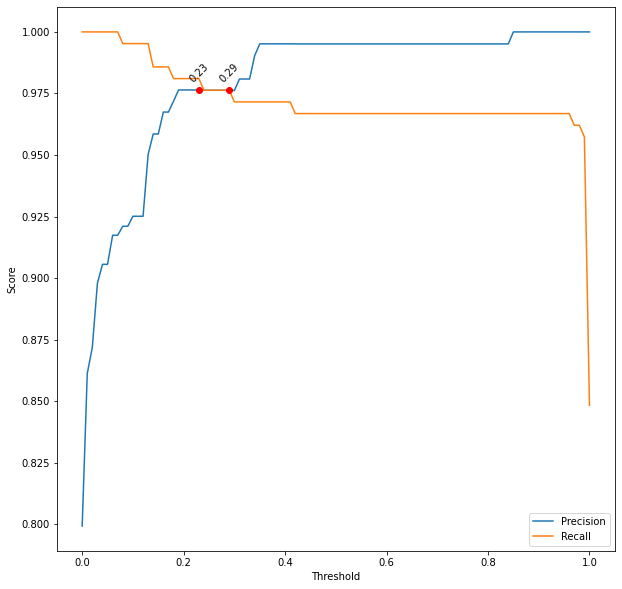

In [296]:
plt.figure(figsize=(10,10))
plt.plot(df_scores.threshold, df_scores.precision, label='Precision')
plt.plot(df_scores.threshold, df_scores.recall, label='Recall')

idx = np.argwhere(np.diff(np.sign(df_scores.precision - df_scores.recall))).flatten()
plt.plot(df_scores.threshold[idx], df_scores.precision[idx], 'ro')
for i in range(len(df_scores.threshold[idx])):
  plt.text(df_scores.threshold[idx].iloc[i], df_scores.precision[idx].iloc[i] + 0.003, f'{df_scores.threshold[idx].iloc[i]}', rotation=45, ha='center')   # 0.0.3 is just a padding for text to be more readable
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing $F_1$:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.1
- 0.4 ⏪
- 0.6
- 0.7


In [297]:
thresholds = np.linspace(0, 1, 101)

scores = []

for t in thresholds:
  _, tp, fp, tn, fn, precision, recall = confusion_matrix_values(y_val, y_val_pred, t)
  f1 = 2 * ((precision * recall) / (precision + recall))
  scores.append((t, tp, fp, fn, tn, precision, recall, f1))

columns =  ['threshold', 'tp', 'fp', 'fn', 'tn', 'precision', 'recall', 'f1']
df_scores = pd.DataFrame(scores, columns = columns)

df_scores

,threshold,tp,fp,fn,tn,precision,recall,f1
0,0.00,211,53,0,0,0.799242,1.000000,0.888421
1,0.01,211,34,0,19,0.861224,1.000000,0.925439
2,0.02,211,31,0,22,0.871901,1.000000,0.931567
3,0.03,211,24,0,29,0.897872,1.000000,0.946188
4,0.04,211,22,0,31,0.905579,1.000000,0.950450
...,...,...,...,...,...,...,...,...
96,0.96,204,0,7,53,1.000000,0.966825,0.983133
97,0.97,203,0,8,53,1.000000,0.962085,0.980676
98,0.98,203,0,8,53,1.000000,0.962085,0.980676
99,0.99,202,0,9,53,1.000000,0.957346,0.978208


In [298]:
df_scores[['threshold', 'f1']].sort_values(by='f1', ascending=False)[:10]

,threshold,f1
39,0.39,0.983213
38,0.38,0.983213
37,0.37,0.983213
36,0.36,0.983213
35,0.35,0.983213
41,0.41,0.983213
40,0.40,0.983213
88,0.88,0.983133
85,0.85,0.983133
86,0.86,0.983133


In [299]:
# pd.reset_option('display.precision')

In [300]:
df_scores[['threshold', 'f1']].sort_values(by='f1', ascending=False).iloc[0].threshold.round(1)

0.4

## Question 5

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


How large is standard devidation of the AUC scores across different folds?

- 0.003 ⏪
- 0.014
- 0.09
- 0.24

In [301]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]

  y_train = df_train.card.values
  y_val = df_val.card.values

  dv, model = train(df=df_train, y=y_train, C=1.0)
  y_pred = predict(df_val, dv, model)

  auc = roc_auc_score(y_val, y_pred)
  scores.append(auc)
scores

0it [00:00, ?it/s]

[0.9941860465116279,
 0.9941176470588236,
 0.9943346508563901,
 0.9996107939802803,
 1.0]

In [302]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.996 +- 0.003


## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)


Which C leads to the best mean score?

- 0.01
- 0.1
- 1 ⏪
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [303]:
for C in tqdm([0.01, 0.1, 1, 10]):
  scores = []

  kfold = KFold(n_splits=5, shuffle=True, random_state=1)

  for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
  
  print('C=%s\tmean=%.3f\tsd = +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01	mean=0.992	sd = +- 0.006
C=0.1	mean=0.995	sd = +- 0.004
C=1	mean=0.996	sd = +- 0.003
C=10	mean=0.996	sd = +- 0.003


## Submit the results

* Submit your results here: https://forms.gle/8TfKNRd5Jq7sGK5M9
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is October 3 (Monday), 23:00 CEST.

After that, the form will be closed.